In [45]:
import pandas as pd
from scipy import stats
import numpy as np
#Use the relative path for excel
file_path = 'INF2178_A1_data.xlsx'

#load in the data from excel file 
df = pd.read_excel(file_path, sheet_name='data')
df.head()



,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [46]:
#Problem 2 -t-tests to exam difference in continuous variables based on categorical variables 
#Calculate a new continous variable shelter program occupancy rate(occupied/capacity), do that calulation separately for difference "Capacity Type"

#Calculate for "Bed Based Capacity"
df.loc[df['CAPACITY_TYPE'] == 'Bed Based Capacity', 'BED_OCCUPANCY_RATE'] = (
    df.loc[df['CAPACITY_TYPE'] == 'Bed Based Capacity', 'OCCUPIED_BEDS']/df.loc[df['CAPACITY_TYPE'] == 'Bed Based Capacity', 'CAPACITY_ACTUAL_BED']
)

#Calculate for "Room Based Capacity"
df.loc[df['CAPACITY_TYPE'] == 'Room Based Capacity', 'ROOM_OCCUPANCY_RATE'] = (
    df.loc[df['CAPACITY_TYPE'] == 'Room Based Capacity', 'OCCUPIED_ROOMS']/df.loc[df['CAPACITY_TYPE'] == 'Room Based Capacity', 'CAPACITY_ACTUAL_ROOM']
)

#Combining the two capacity types together into one column
df['OCCUPANCY_RATE'] = np.where(df['ROOM_OCCUPANCY_RATE'].notnull(), 
                                df['ROOM_OCCUPANCY_RATE'], 
                                df['BED_OCCUPANCY_RATE'])
df.head()


,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,BED_OCCUPANCY_RATE,ROOM_OCCUPANCY_RATE,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,NaN,0.896552,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,NaN,1.000000,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,NaN,0.821429,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,NaN,1.000000,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,NaN,0.928571,0.928571


In [47]:
#Perform t-test based on grouping by categorical variables: 

for categorical_variable in ['CAPACITY_TYPE','PROGRAM_MODEL','PROGRAM_AREA','SECTOR','OVERNIGHT_SERVICE_TYPE']:
    print('Categorical Variable: ',categorical_variable)

    #Get top two categories in that categorical variable
    top_categories = df[categorical_variable].value_counts().nlargest(2).index.tolist()
    
    if len(top_categories) < 2:
        print("Not enough categories to perform t-test for", categorical_variable)
        continue

    LargestCategory_Name, SecondLargestCategory_Name = top_categories

    # Filter the data by those categorical variables
    LargestCategory_occupancy_rates = df[df[categorical_variable] == LargestCategory_Name]['OCCUPANCY_RATE'].dropna()
    SecondLargestCategory_occupancy_rates = df[df[categorical_variable] == SecondLargestCategory_Name]['OCCUPANCY_RATE'].dropna()

    # Do the t-test on the two groupings of data
    print('LargestCategory: ', LargestCategory_Name)
    print('SecondLargestCategory: ', SecondLargestCategory_Name)
    t_stat, p_value = stats.ttest_ind(LargestCategory_occupancy_rates, SecondLargestCategory_occupancy_rates, equal_var=False)

    print('t_stat: ', t_stat)
    print('p_value: ', p_value,'\n')


Categorical Variable:  CAPACITY_TYPE
LargestCategory:  Bed Based Capacity
SecondLargestCategory:  Room Based Capacity
t_stat:  -4.498751771925636
p_value:  6.860477551487939e-06 

Categorical Variable:  PROGRAM_MODEL
LargestCategory:  Emergency
SecondLargestCategory:  Transitional
t_stat:  40.981115372199206
p_value:  0.0 

Categorical Variable:  PROGRAM_AREA
LargestCategory:  Base Shelter and Overnight Services System
SecondLargestCategory:  COVID-19 Response
t_stat:  -1.5866745759142311
p_value:  0.11260020158249515 

Categorical Variable:  SECTOR
LargestCategory:  Mixed Adult
SecondLargestCategory:  Men
t_stat:  -34.11996567778571
p_value:  1.136400440193183e-248 

Categorical Variable:  OVERNIGHT_SERVICE_TYPE
LargestCategory:  Shelter
SecondLargestCategory:  Motel/Hotel Shelter
t_stat:  -43.02797682274645
p_value:  0.0 



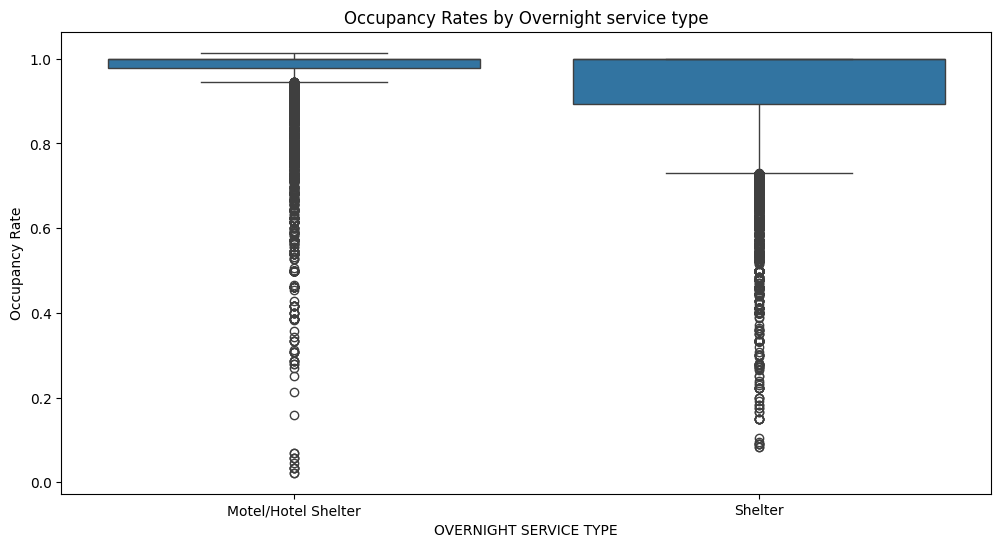

In [48]:
#Problem 3 - exploratory data analysis
import seaborn as sns #if error on marker's end, might need to use "pip install seaborn" or "pip3 install seaborn" in cmd or terminal to install seaborn
import matplotlib.pyplot as plt
from scipy import stats
# Boxplots for OVERNIGHT_SERVICE_TYPE category comparison
top2categories = df['OVERNIGHT_SERVICE_TYPE'].value_counts().nlargest(2).index.tolist()
LargestCategory_Name, SecondLargestCategory_Name = top_categories
df_filterToTop2OVERNIGHT_SERVICE_TYPE=df[(df['OVERNIGHT_SERVICE_TYPE'] == LargestCategory_Name) | (df['OVERNIGHT_SERVICE_TYPE'] == SecondLargestCategory_Name)][:]
plt.figure(figsize=(12, 6))
sns.boxplot(x='OVERNIGHT_SERVICE_TYPE', y='OCCUPANCY_RATE', data=df_filterToTop2OVERNIGHT_SERVICE_TYPE)
plt.title('Occupancy Rates by Overnight service type')
plt.xlabel('OVERNIGHT SERVICE TYPE')
plt.ylabel('Occupancy Rate')
plt.show()


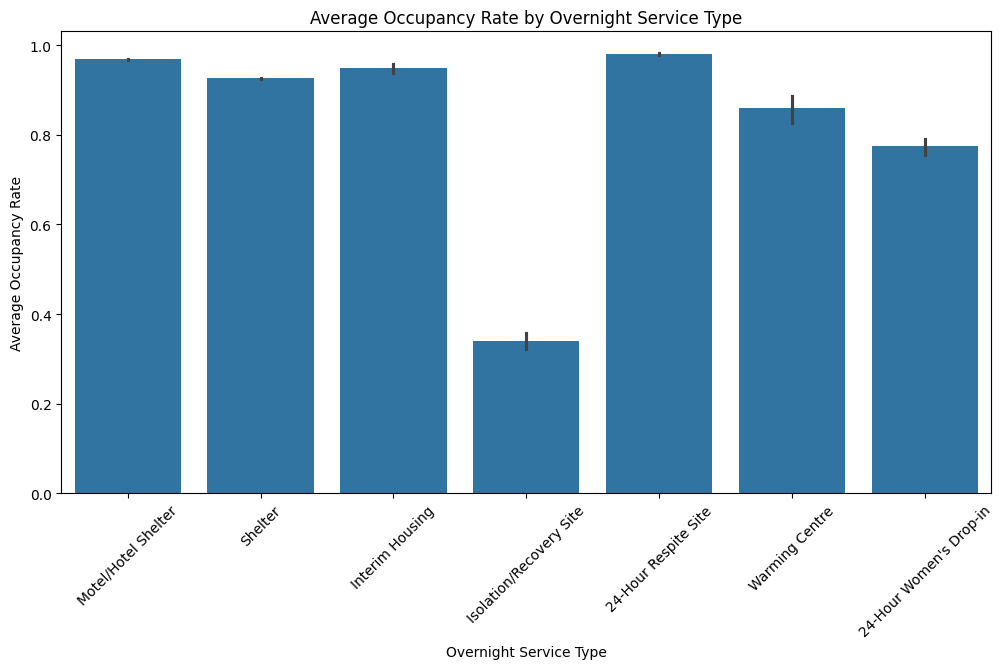

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='OVERNIGHT_SERVICE_TYPE', y='OCCUPANCY_RATE', data=df, estimator=np.mean)
plt.title('Average Occupancy Rate by Overnight Service Type')
plt.xlabel('Overnight Service Type')
plt.xticks(rotation=45)
plt.ylabel('Average Occupancy Rate')
plt.show()
# it appreas isolation/Recovery Site has lowest and vey low occupant rate

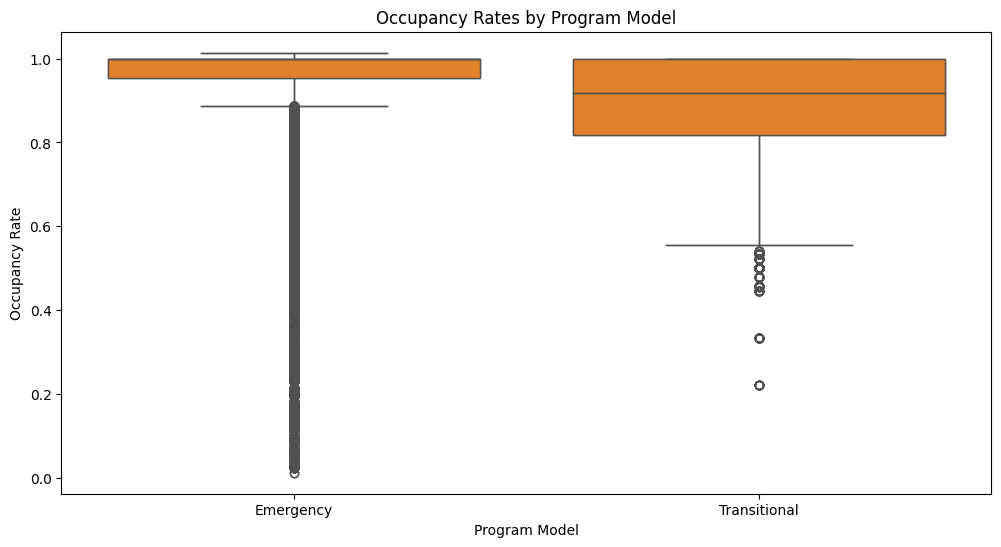

In [50]:
#Problem 3 - exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Boxplots for 'Program Model' category comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df)#Problem 3 - exploratory data analysis
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df)
plt.title('Occupancy Rates by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Occupancy Rate')
plt.show()

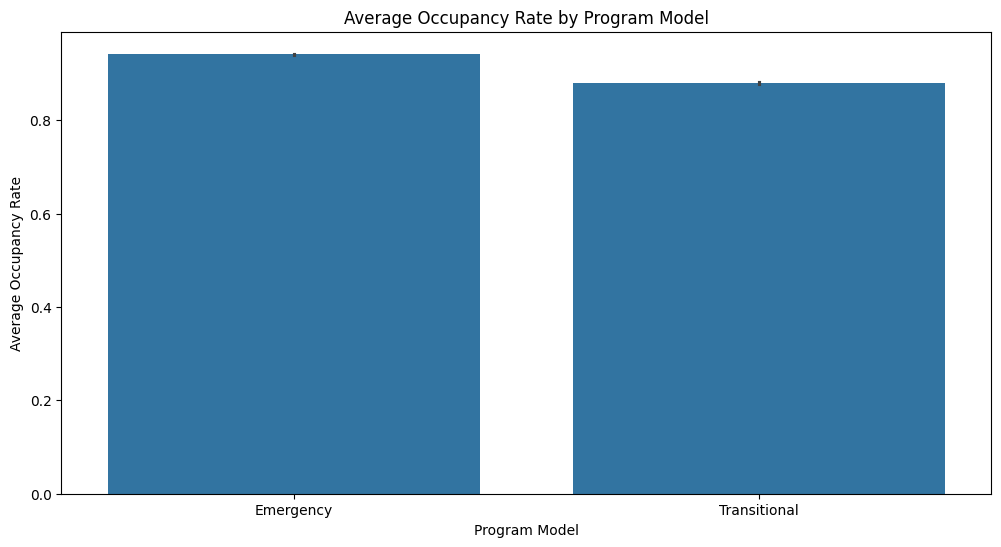

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE', data=df, estimator=np.mean)
plt.title('Average Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Average Occupancy Rate')
plt.show()

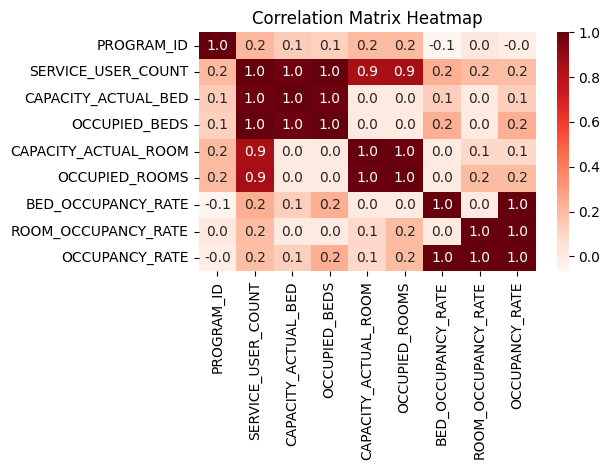

In [52]:
# Correlation Analysis
# plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True).fillna(0)
sns.heatmap(correlation_matrix, cmap='Reds',fmt=".1f", annot_kws={"size": 10},annot=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout() 
plt.show()
#from correlation matrix heatmap

In [53]:
#compute stats on data
print(df.describe())

                      OCCUPANCY_DATE    PROGRAM_ID  SERVICE_USER_COUNT  \
count                          50944  50944.000000        50944.000000   
mean   2021-06-29 13:31:57.022612992  13986.125844           45.727171   
min              2021-01-01 00:00:00  11791.000000            1.000000   
25%              2021-03-30 00:00:00  12233.000000           15.000000   
50%              2021-06-28 00:00:00  14251.000000           28.000000   
75%              2021-09-29 00:00:00  15651.000000           51.000000   
max              2021-12-31 00:00:00  16631.000000          339.000000   
std                              NaN   1705.288632           53.326049   

       CAPACITY_ACTUAL_BED  OCCUPIED_BEDS  CAPACITY_ACTUAL_ROOM  \
count         32399.000000   32399.000000          18545.000000   
mean             31.627149      29.780271             55.549259   
min               1.000000       1.000000              1.000000   
25%              15.000000      14.000000             19.000000  

In [54]:
# one interesting thing I want to examine from this is whether the BED_OCCUPANCY_RATE is statistically different from ROOM_OCCUPANCY_RATE using t-test, given their means are close:
t_stat, p_value = stats.ttest_ind(df['BED_OCCUPANCY_RATE'].dropna(), df['ROOM_OCCUPANCY_RATE'].dropna(), equal_var=False)

print('t_stat: ', t_stat)
print('p_value: ', p_value,'\n')
#based on the t-test statistic, they are close

t_stat:  -4.498751771925636
p_value:  6.860477551487939e-06 



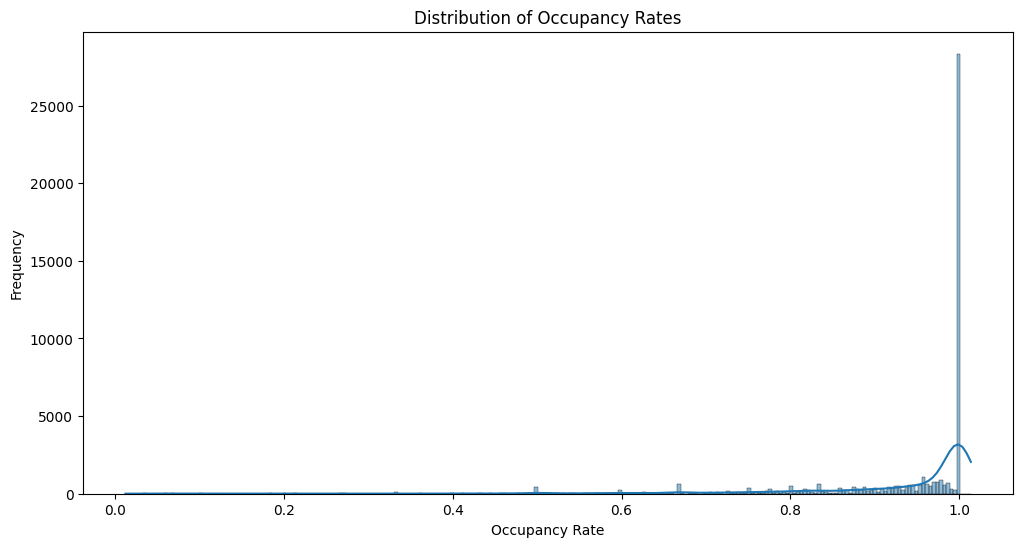

In [55]:
#Visualize the distribution of occupancy rate
plt.figure(figsize=(12, 6))
sns.histplot(df['OCCUPANCY_RATE'].dropna(), kde=True)
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()
#it seems mvast majority are 100%/1.0 occupancy rate

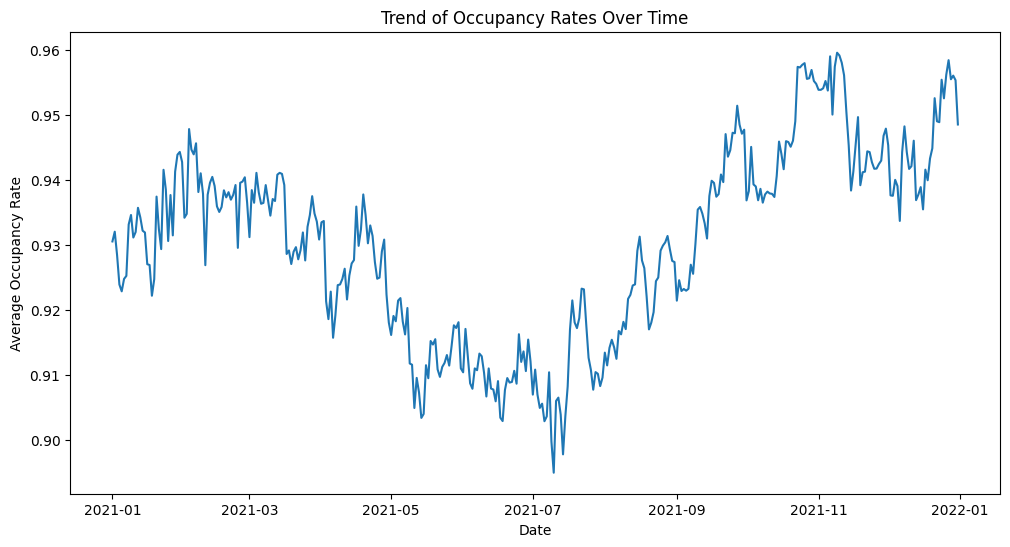

In [56]:
# Time Series Trend Analysis
df['OCCUPANCY_DATE'] = pd.to_datetime(df['OCCUPANCY_DATE'])
plt.figure(figsize=(12, 6))
df_time_series = df.groupby('OCCUPANCY_DATE')['OCCUPANCY_RATE'].mean()
plt.plot(df_time_series)
plt.title('Trend of Occupancy Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Average Occupancy Rate')
plt.show()
#it shows that it has higher occupancy rates in winter than in summer, and overall increasing trend 

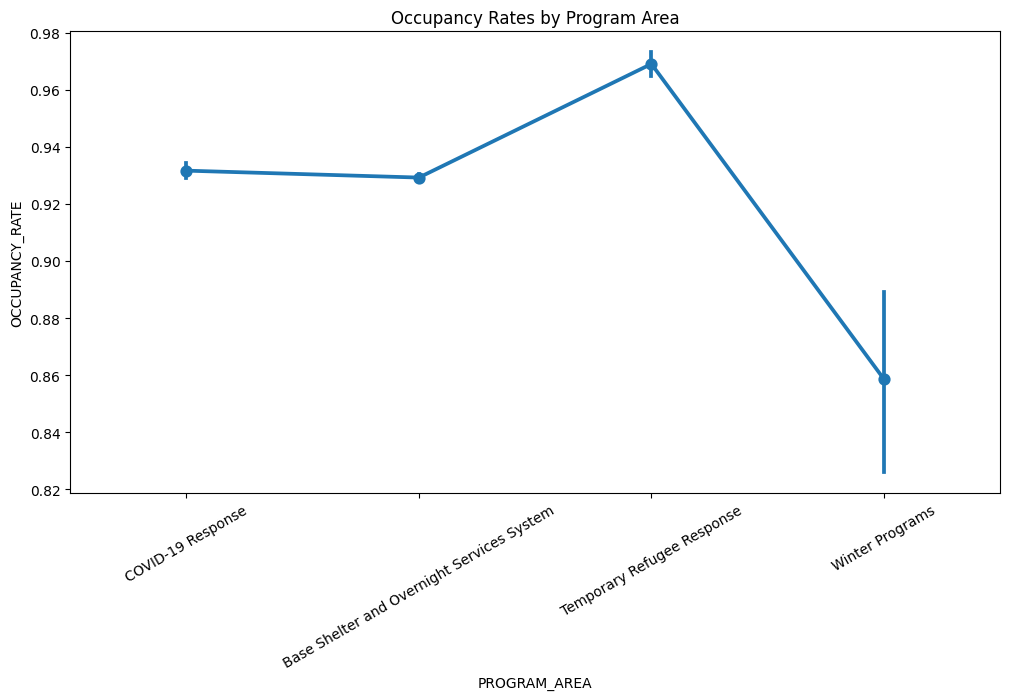

In [57]:
# Analysis by Program Area
plt.figure(figsize=(12, 6))
sns.pointplot(x='PROGRAM_AREA', y='OCCUPANCY_RATE', data=df)
plt.title('Occupancy Rates by Program Area')
plt.xticks(rotation=30)
plt.show()
# it shows refugee has higher occupancy rates and winter program has lower occpancy rate

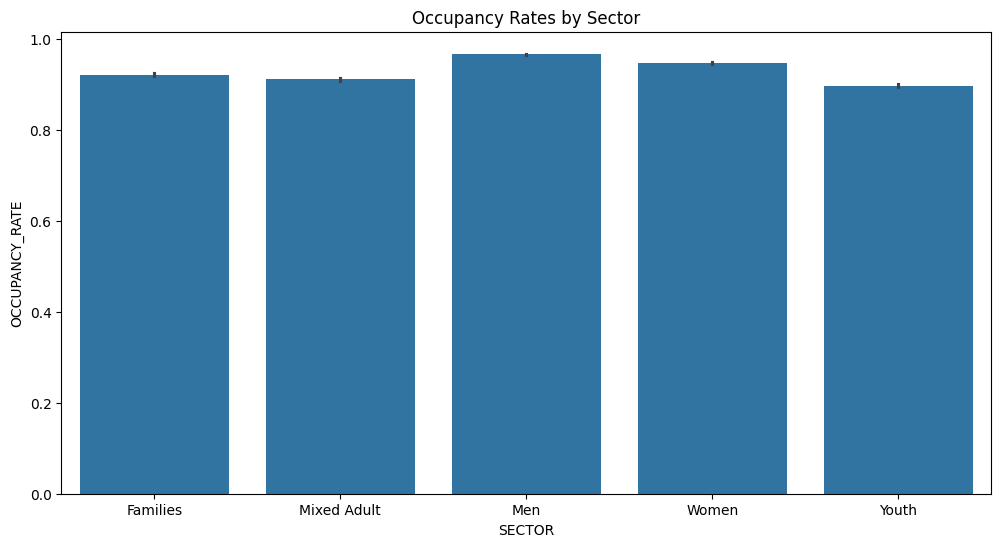

In [58]:
# Comparative Analysis by Sector
plt.figure(figsize=(12, 6))
sns.barplot(x='SECTOR', y='OCCUPANCY_RATE', data=df)
plt.title('Occupancy Rates by Sector')
plt.show()

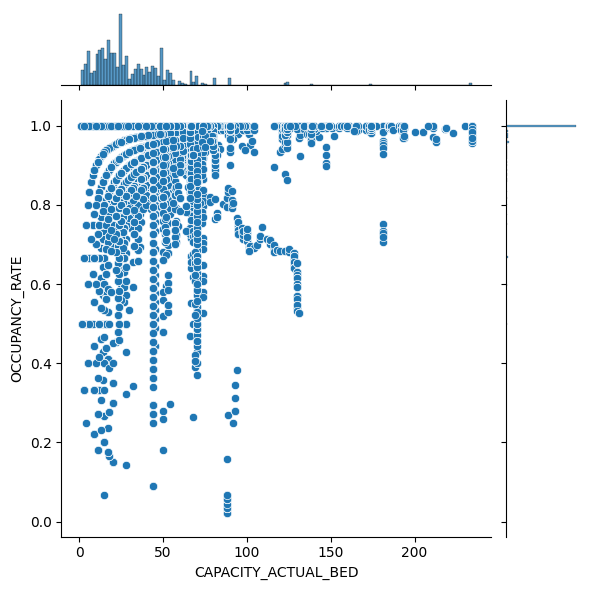

In [59]:
# Capacity Utilization Analysis
sns.jointplot(x='CAPACITY_ACTUAL_BED', y='OCCUPANCY_RATE', data=df, kind='scatter')
plt.show()

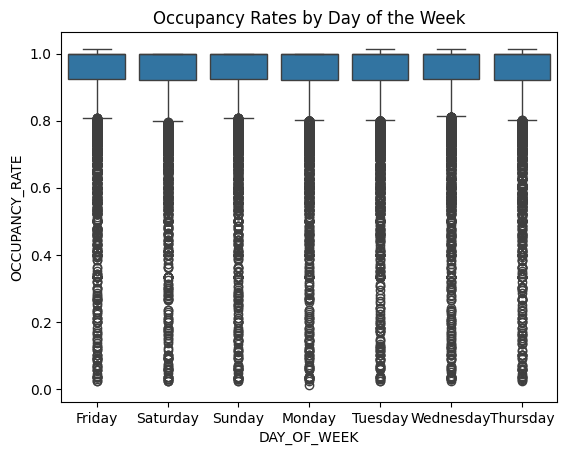

In [60]:
# Daily Occupancy Patterns (assuming 'OCCUPANCY_DATE' is in datetime format)
df['DAY_OF_WEEK'] = df['OCCUPANCY_DATE'].dt.day_name()
sns.boxplot(x='DAY_OF_WEEK', y='OCCUPANCY_RATE', data=df)
plt.title('Occupancy Rates by Day of the Week')
plt.show()

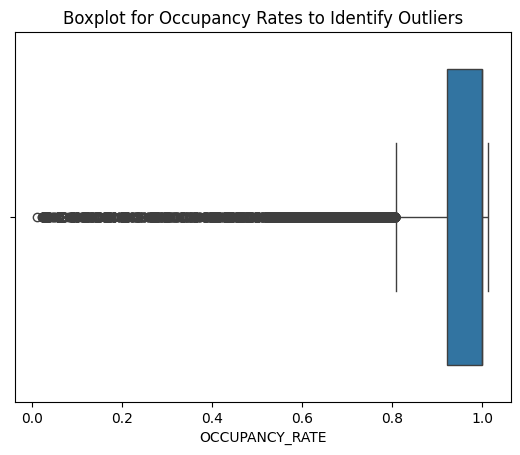

In [61]:
# Examine Outliers
sns.boxplot(x='OCCUPANCY_RATE', data=df)
plt.title('Boxplot for Occupancy Rates to Identify Outliers')
plt.show()

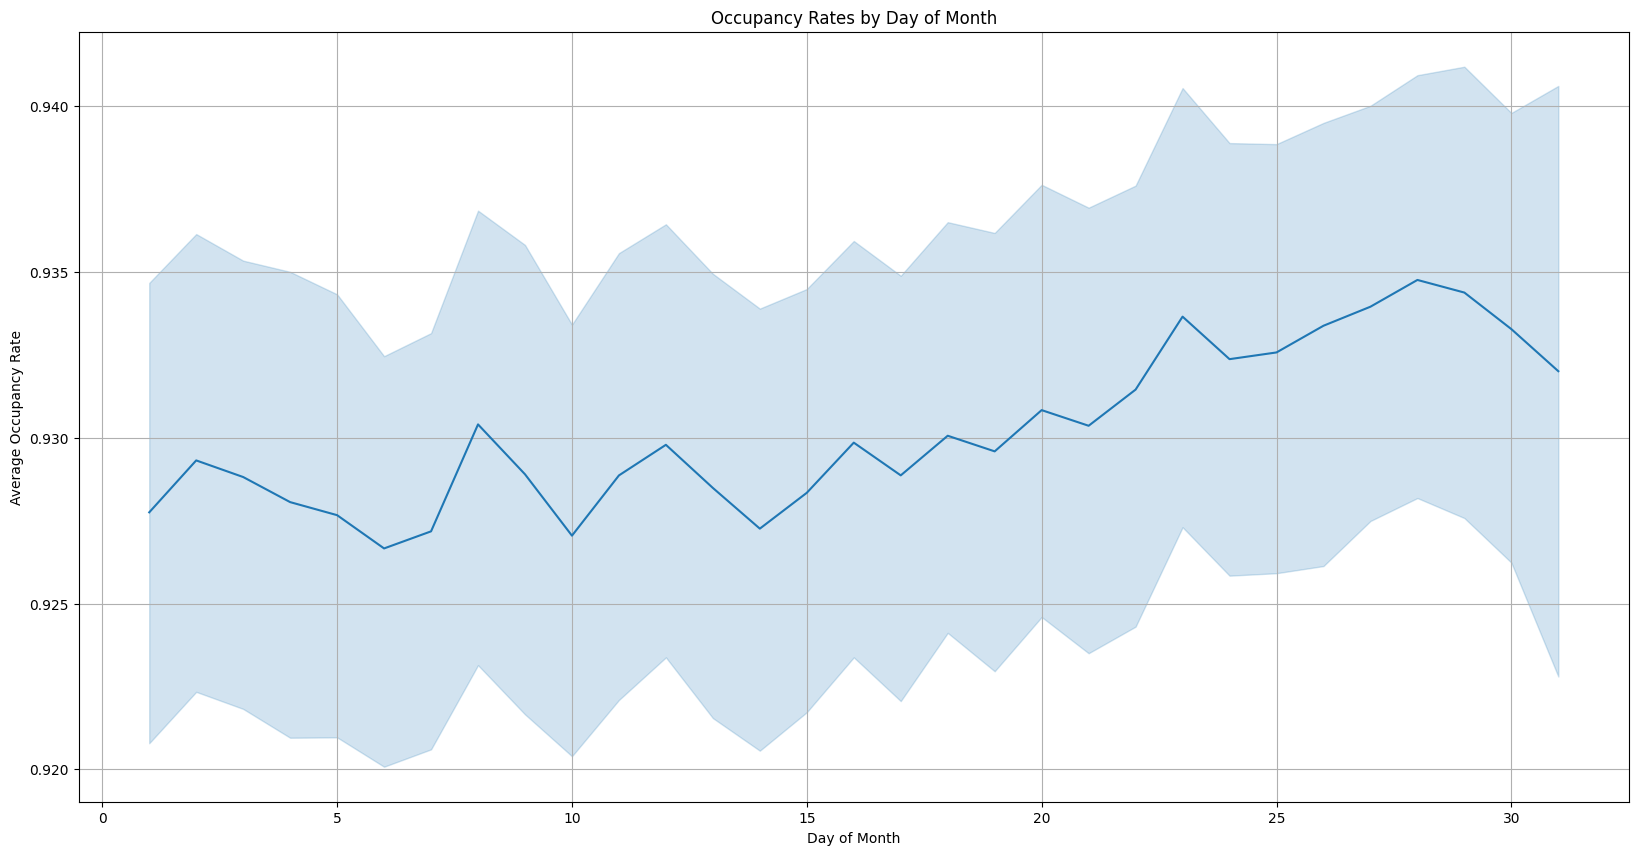

In [62]:
# Occupancy by Day of Month
df['DAY_OF_MONTH'] = df['OCCUPANCY_DATE'].dt.day
plt.figure(figsize=(20, 10))
sns.lineplot(x='DAY_OF_MONTH', y='OCCUPANCY_RATE', data=df, estimator='mean')
plt.title('Occupancy Rates by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Occupancy Rate')
plt.grid(True)
plt.show()
#slighly higher by month end

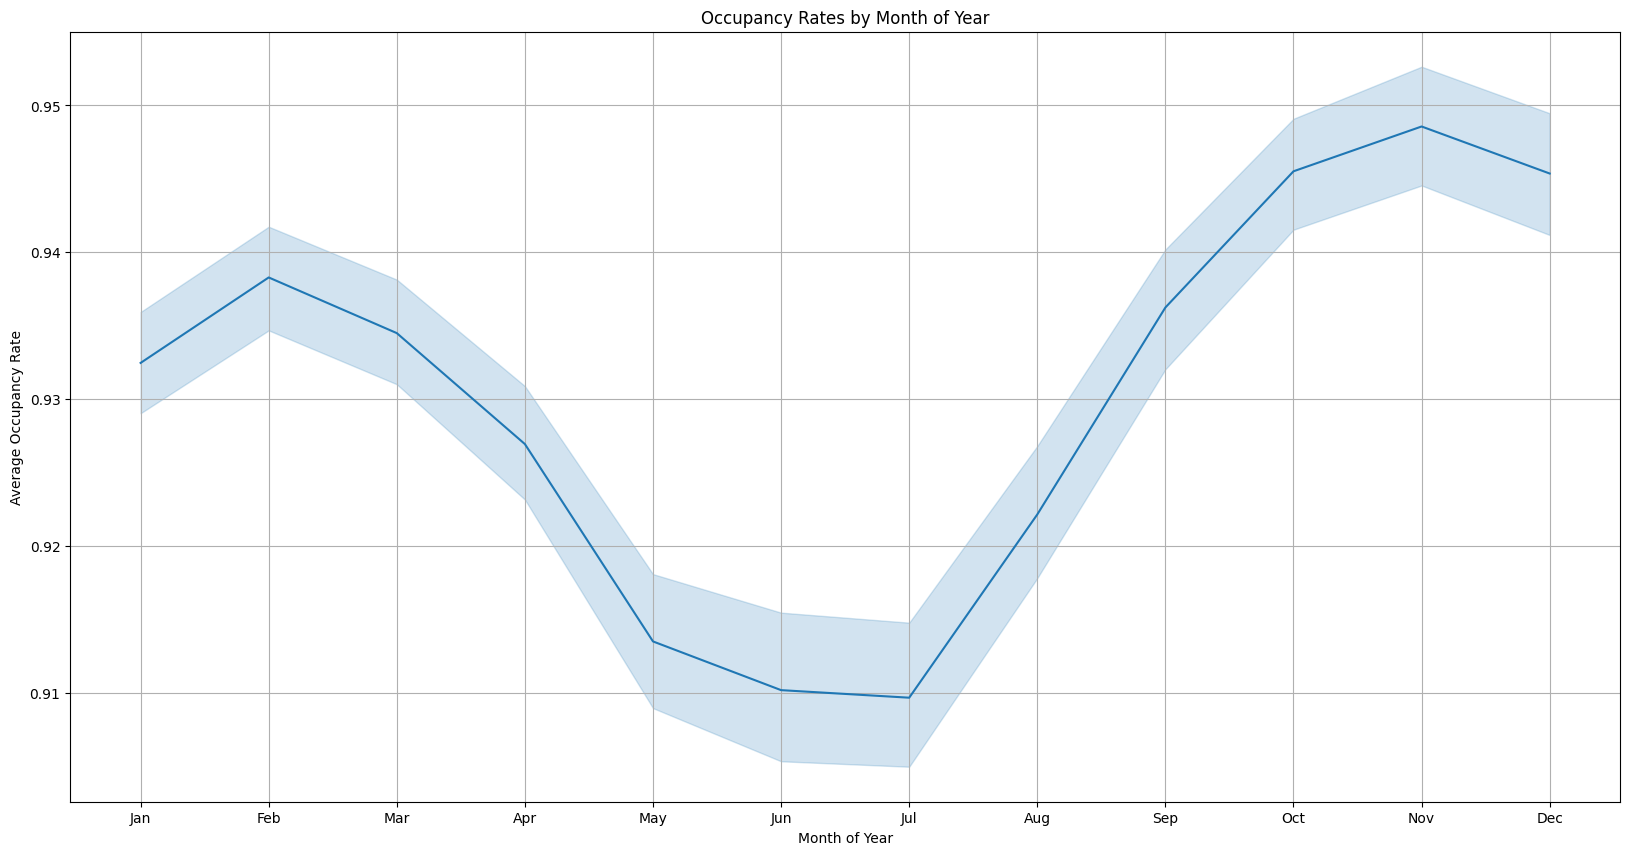

In [63]:
# Occupancy by Month of Year
df['MONTH_OF_YEAR'] = df['OCCUPANCY_DATE'].dt.month
plt.figure(figsize=(20, 10))
sns.lineplot(x='MONTH_OF_YEAR', y='OCCUPANCY_RATE', data=df, estimator='mean')
plt.title('Occupancy Rates by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Average Occupancy Rate')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()
#again summer season is when the occupation rate drops